## MNIST CLASSIFIER USING CNN
### HASHIR BIN ANWER
### 335

In [25]:
#IMPORT LIBRARIES
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [26]:
#LOAD DATASET
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

img_rows, img_cols=28, 28

if keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    inpx = (1, img_rows, img_cols)

else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    inpx = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [27]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)  
print("x_test shape:", x_test.shape)   
print("y_test shape:", y_test.shape)    

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000,)


In [28]:
#Define Model
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(3, 3)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(250, activation='sigmoid'),
    layers.Dense(10, activation='softmax') 
])

In [29]:
#Model Compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
#Train model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 101s 54ms/step - loss: 0.1489 - accuracy: 0.9561 - val_loss: 0.0539 - val_accuracy: 0.9830
Epoch 2/5
1875/1875 [==============================] - 100s 53ms/step - loss: 0.0550 - accuracy: 0.9832 - val_loss: 0.0394 - val_accuracy: 0.9871
Epoch 3/5
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0402 - accuracy: 0.9874 - val_loss: 0.0290 - val_accuracy: 0.9909
Epoch 4/5
1875/1875 [==============================] - 98s 52ms/step - loss: 0.0328 - accuracy: 0.9894 - val_loss: 0.0262 - val_accuracy: 0.9917
Epoch 5/5
1875/1875 [==============================] - 107s 57ms/step - loss: 0.0279 - accuracy: 0.9911 - val_loss: 0.0266 - val_accuracy: 0.9915


In [31]:
#Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

Test accuracy: 99.15%


### VISUALIZATION

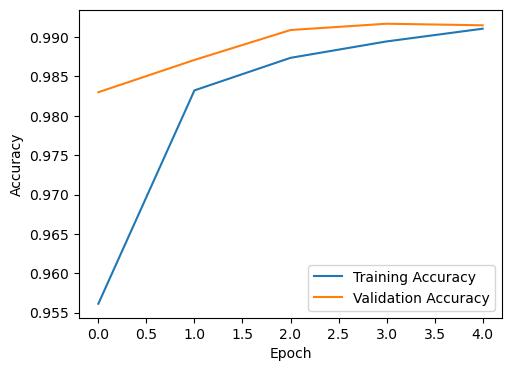

In [32]:
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

### PREDICTION

1/1 [==============================] - 0s 14ms/step


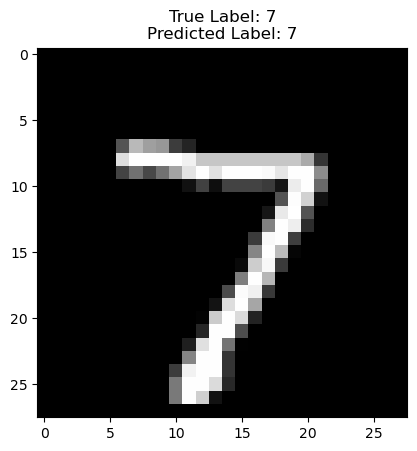

1/1 [==============================] - 0s 14ms/step


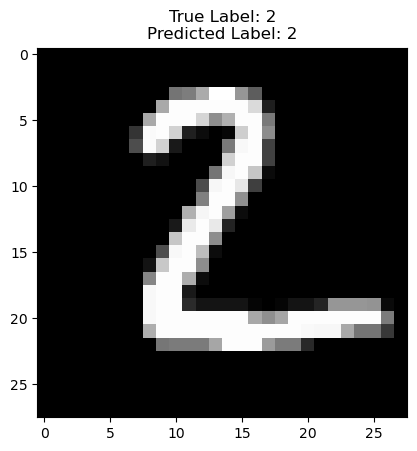

1/1 [==============================] - 0s 14ms/step


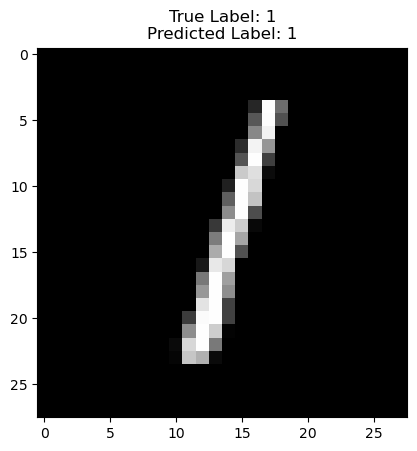

1/1 [==============================] - 0s 15ms/step


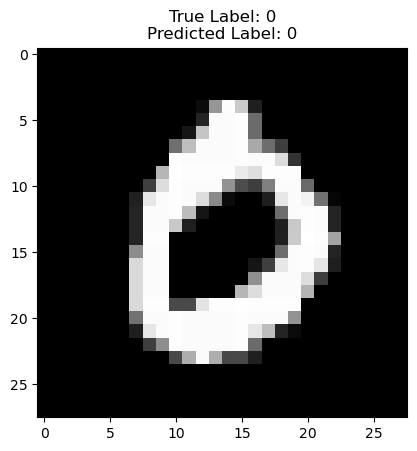

1/1 [==============================] - 0s 16ms/step


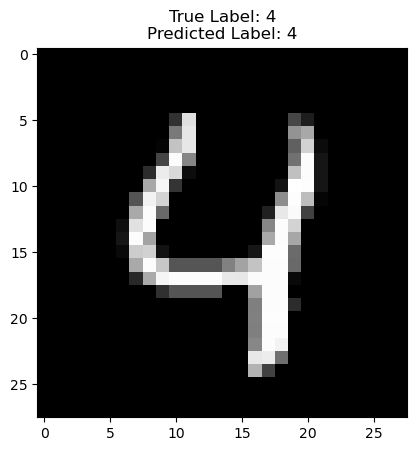

In [36]:
for image_index in range(5):
    # Get the image and true label
    image = x_test[image_index]
    true_label = y_test[image_index]

    # Add a batch dimension and make a prediction
    image = np.expand_dims(image, axis=0)
    predictions = model.predict(image)
    predicted_label = np.argmax(predictions)

    # Display the image
    plt.figure()
    plt.imshow(x_test[image_index], cmap='gray')
    plt.title(f'True Label: {true_label}\nPredicted Label: {predicted_label}')
    plt.show()